# Challenge 5.5.4

Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the [data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). And here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Note: If ordinal data is only 5, use nonparametric test.  At 10 or more, you can use parametric tests. In between, it's a judgement call.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


According to the codebook, 6 is 2012 and 7 is 2014.

In [4]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

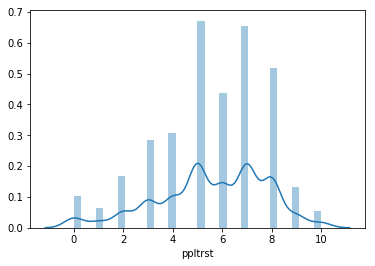

In [7]:
sns.distplot( df["ppltrst"])

The ppltrst histogram looks roughly normal, though we are looking at ranking data, not continuous data.  

We could use a pairwise t-test, since there seems to be survey respondesnts in 2012 that also responded in 2014.  However, if a respondent doesn't respond to both surveys, we lose that data.  So we will just use a t-test 

In [8]:
cntry_list = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

for c in cntry_list:
    print(c + ':')
    print(stats.ttest_ind(df.loc[(df['cntry'] == c) & (df['year'] == 6)].ppltrst, 
                          df.loc[(df['cntry'] == c) & (df['year'] == 7)].ppltrst))

CH:
Ttest_indResult(statistic=-0.7156974792217816, pvalue=0.4742916002909491)
CZ:
Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976)
DE:
Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732)
ES:
Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363)
NO:
Ttest_indResult(statistic=0.5119224181145228, pvalue=0.6087850218131978)
SE:
Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.0428293634522298)


We have two signficant p-values for Estonia and Sweden.  Estonians became more trusting between 2012 and 2014 and Swedes became less trusting.

## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [9]:
for c in cntry_list:
    print(c + ':')
    print(stats.ttest_ind(df.loc[(df['cntry'] == c) & (df['year'] == 6)].happy, 
                          df.loc[(df['cntry'] == c) & (df['year'] == 7)].happy))

CH:
Ttest_indResult(statistic=-0.812142488327401, pvalue=0.4168411011770018)
CZ:
Ttest_indResult(statistic=-1.1592536826704618, pvalue=0.24658245820500238)
DE:
Ttest_indResult(statistic=-0.966317541228559, pvalue=0.3431409128727073)
ES:
Ttest_indResult(statistic=1.3750588408504656, pvalue=0.16924771370417369)
NO:
Ttest_indResult(statistic=4.152957205997266, pvalue=3.4778681704487346e-05)
SE:
Ttest_indResult(statistic=-0.5372790210326394, pvalue=0.5911442306272388)


Norway has a significant pvalue.  We have evidence that Norweigens are happier in 2014 compared to 2012. 

## Who reported watching more TV in 2012, men or women?
1 is male and 2 is female in the dataset.

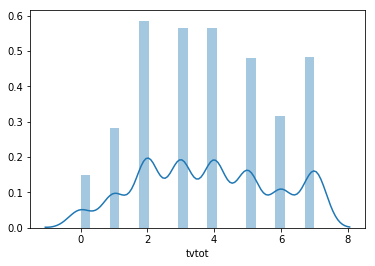

In [10]:
sns.distplot( df["tvtot"])

In [11]:
 print(stats.mannwhitneyu(df.loc[(df['gndr'] == 1)].tvtot, 
                          df.loc[(df['gndr'] == 2)].tvtot))

MannwhitneyuResult(statistic=8122750.5, pvalue=0.049256286965603954)


We are using Mann-Whitney here because the data is not normal.  With a p-value of 0.049, we have barely enough evidence to reject the null that men and women watch the same amount of tv. I would say that the difference is not signficant.


## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In the partner column, 1 means living with partner and 2 means not living with partner. 

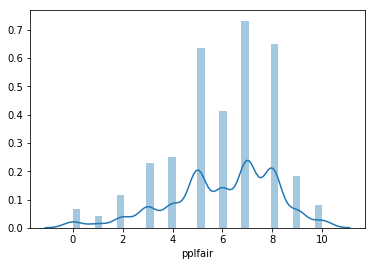

In [12]:
sns.distplot( df["pplfair"])

Graph is roughly normal here.  Let's use the t-test.

In [13]:
print(stats.ttest_ind(df.loc[(df['partner'] == 1) & (df['year'] == 6)].pplfair, 
                          df.loc[(df['partner'] == 2) & (df['year'] == 6)].pplfair))

Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)


The pvalue is significant here.  People who are living with a partner is more likely to believe people were fair in 2012 than people living alone.

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Let's first look at the boxplot

In [14]:
df2=df.loc[df['cntry'].isin(['CH','CZ','ES']) & (df['year'] == 6)]

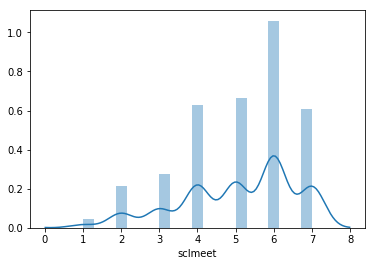

In [15]:
sns.distplot( df2["sclmeet"])

There is a skew in the plot, so we are going to use Kruskal-Wallis, the nonparametric test for one way ANOVA.  

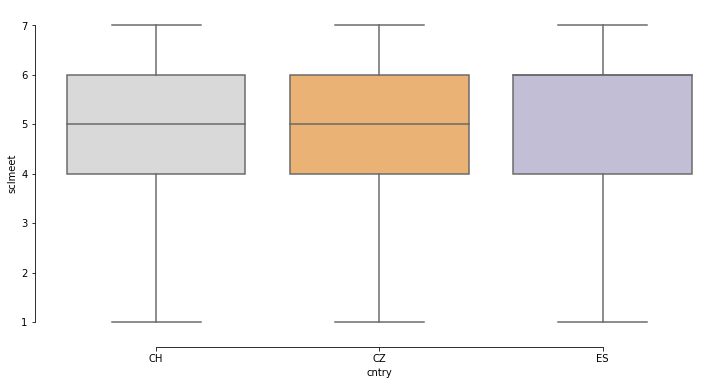

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x="cntry", y="sclmeet", data=df2, palette="Set3_r")
sns.despine(offset=10, trim=True)

They all look the same.

In [17]:
stats.kruskal(
    df.loc[(df['cntry'] == 'CH') & (df['year'] == 7)].sclmeet,
    df.loc[(df['cntry'] == 'CZ') & (df['year'] == 7)].sclmeet,
    df.loc[(df['cntry'] == 'ES') & (df['year'] == 7)].sclmeet)

KruskalResult(statistic=126.52408817790707, pvalue=3.354620049166388e-28)

p-value is very low, indicating that there is a significant difference between how many times people in China, Czech Republic and Denmark meet.  This is different than I would have expected from the boxplots.

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df2['sclmeet'],      # Data
                          groups=df2['cntry'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()  

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.3922,-0.5844,-0.2,True
CH,ES,0.0976,-0.0673,0.2625,False
CZ,ES,0.4898,0.3143,0.6654,True


Running the Tukey test, we can see where the difference lies. It looks like China and Czech Republic have significantly different social meeting patterns, and Czech is different from Estonians.  The differences between China and Estonia are not significant enough to reject the null hypothesis.

### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

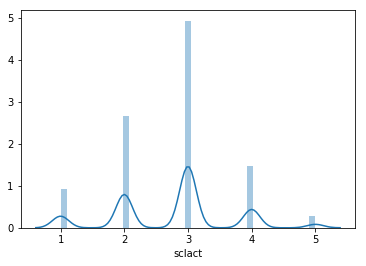

In [19]:
sns.distplot( df["sclact"])

As there are only 5 ordinal options, we will use Mann-Whitney here or Kruskal-Wallis test. 

In [20]:
df['age_grp'] = pd.cut(df['agea'], [0, 35, 45, 55, 65, 75, 150], labels=['0-35'
                            ,'36-45','46-55','56-65','66-75','76+'])

Let's look at China first.

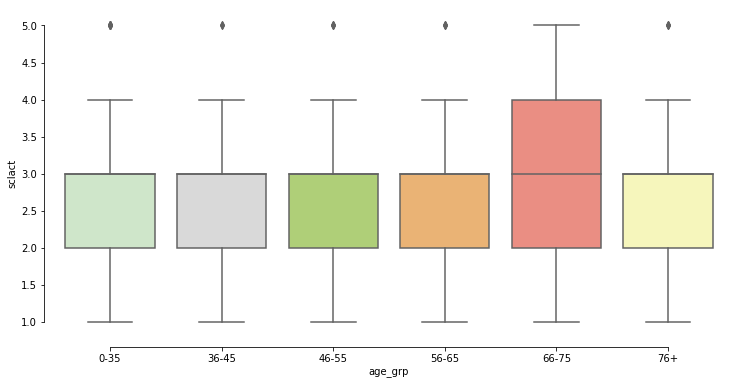

In [21]:
ch = df.loc[(df['cntry'] == 'CH') & (df['year'] == 7)]

plt.figure(figsize=(12,6))
sns.boxplot(x="age_grp", y="sclact", data= ch, palette="Set3_r")
sns.despine(offset=10, trim=True)

In [22]:
stats.kruskal(
    ch.loc[ch['age_grp'] == '0-35'].sclact,
    ch.loc[(ch['age_grp'] == '36-45')].sclact,
    ch.loc[(ch['age_grp'] == '46-55')].sclact,
    ch.loc[(ch['age_grp'] == '56-65')].sclact,
    ch.loc[(ch['age_grp'] == '66-75')].sclact,
    ch.loc[(ch['age_grp'] == '76+')].sclact)

KruskalResult(statistic=4.163465676568204, pvalue=0.5261291319737488)

No differences in social activity for age groups in China.

What about the Czech Republic?

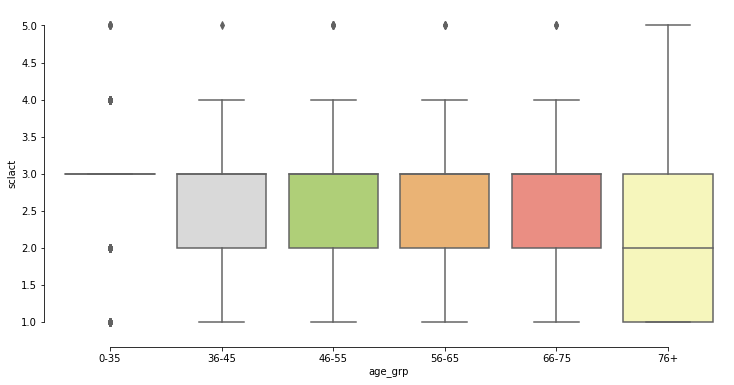

In [23]:
cz = df.loc[df['cntry']=='CZ']

plt.figure(figsize=(12,6))
sns.boxplot(x="age_grp", y="sclact", data= cz, palette="Set3_r")
sns.despine(offset=10, trim=True)

In [24]:
cz.age_grp.value_counts()

0-35     353
36-45    260
56-65    218
46-55    217
66-75    130
76+       29
Name: age_grp, dtype: int64

Older people look less likely to participate in social activities and people under the age of 36 tend to respond the same way so that the boxplot is just a line.  This seems a little unbelievable to me...

In [25]:
stats.kruskal(
    cz.loc[cz['age_grp'] == '0-35'].sclact,
    cz.loc[(cz['age_grp'] == '36-45')].sclact,
    cz.loc[(cz['age_grp'] == '46-55')].sclact,
    cz.loc[(cz['age_grp'] == '56-65')].sclact,
    cz.loc[(cz['age_grp'] == '66-75')].sclact,
    cz.loc[(cz['age_grp'] == '76+')].sclact)

KruskalResult(statistic=34.38660742568639, pvalue=1.9941495030919304e-06)

Kruskal wallis test shows a significant p-value.  Let's run Tukey to see where the significance lies.  I'm guessing with the 0-35 age group.

In [26]:
tukey = pairwise_tukeyhsd(endog=cz['sclact'],      # Data
                          groups=cz['age_grp'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary() 

group1,group2,meandiff,lower,upper,reject
0-35,36-45,-0.2812,-0.4872,-0.0752,True
0-35,46-55,-0.2706,-0.488,-0.0532,True
0-35,56-65,-0.2367,-0.4538,-0.0195,True
0-35,66-75,-0.2543,-0.5129,0.0043,False
0-35,76+,-0.6973,-1.1842,-0.2104,True
36-45,46-55,0.0106,-0.2212,0.2424,False
36-45,56-65,0.0446,-0.1869,0.276,False
36-45,66-75,0.0269,-0.2438,0.2977,False
36-45,76+,-0.416,-0.9095,0.0774,False
46-55,56-65,0.0339,-0.2078,0.2757,False


Yep. Most of the differences are with the 0-35 age group.  

Let's try Estonia

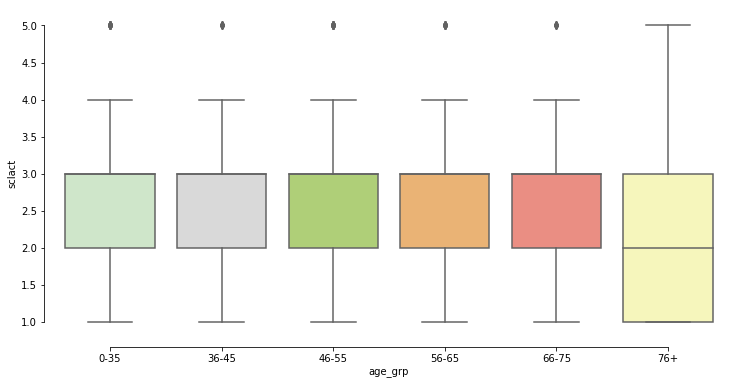

In [27]:
es = df.loc[df['cntry']=='ES']

plt.figure(figsize=(12,6))
sns.boxplot(x="age_grp", y="sclact", data= es, palette="Set3_r")
sns.despine(offset=10, trim=True)

In [28]:
es.age_grp.value_counts()

0-35     653
36-45    447
46-55    445
56-65    350
66-75    229
76+      168
Name: age_grp, dtype: int64

In [29]:
stats.kruskal(
    es.loc[es['age_grp'] == '0-35'].sclact,
    es.loc[(es['age_grp'] == '36-45')].sclact,
    es.loc[(es['age_grp'] == '46-55')].sclact,
    es.loc[(es['age_grp'] == '56-65')].sclact,
    es.loc[(es['age_grp'] == '66-75')].sclact,
    es.loc[(es['age_grp'] == '76+')].sclact)

KruskalResult(statistic=24.89043222613837, pvalue=0.00014628738325358842)

We have a significant p-value, so let's run Tukey to see where the differences are.

In [30]:
tukey = pairwise_tukeyhsd(endog=es['sclact'],      # Data
                          groups=es['age_grp'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
0-35,36-45,-0.0651,-0.2326,0.1025,False
0-35,46-55,-0.0422,-0.2099,0.1256,False
0-35,56-65,-0.0532,-0.234,0.1276,False
0-35,66-75,-0.0358,-0.2454,0.1738,False
0-35,76+,-0.4206,-0.6567,-0.1845,True
36-45,46-55,0.0229,-0.1598,0.2057,False
36-45,56-65,0.0119,-0.1829,0.2067,False
36-45,66-75,0.0293,-0.1925,0.251,False
36-45,76+,-0.3555,-0.6025,-0.1085,True
46-55,56-65,-0.011,-0.206,0.1839,False


The 76+ age group have social activities that are significantly different than the other age groups.  They participate in less activities.